In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distgen.dowell_schmerge_cathode_model import dowell_schmerge_pdf, dowell_schmerge_pdf_bounds, dowell_schmerge_pdf_spherical, dowell_schmerge_pdf_bounds_spherical

Text(0, 0.5, 'p$_z$ (keV/c)')

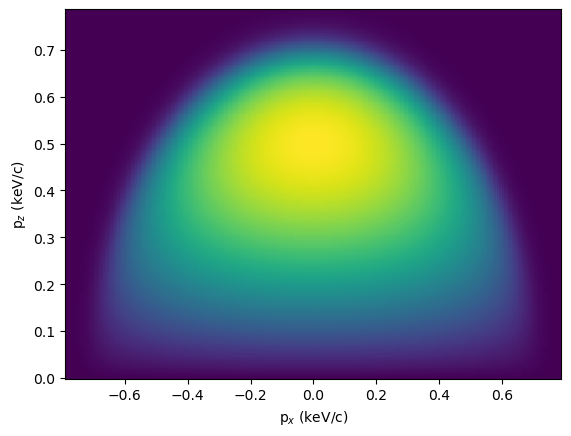

In [2]:
# Plot the projection onto px, pz
fermi_energy = 6
t = 300
photon_energy = 2.5
workfun = 2

n_points = 200
(bxm, bxp), (bym, byp), (bzm, bzp) = dowell_schmerge_pdf_bounds(photon_energy, workfun, t, fermi_energy)
px, py, pz = np.mgrid[bxm:bxp:1j*n_points, bym:byp:1j*n_points, bzm:bzp:1j*n_points]

rho = np.sum(dowell_schmerge_pdf(px, py, pz, photon_energy, workfun, t, fermi_energy), axis=1)
plt.pcolormesh(1e-3*px[:, 0, :], 1e-3*pz[:, 0, :], rho)
plt.xlabel("p$_x$ (keV/c)")
plt.ylabel('p$_z$ (keV/c)')

Text(0, 0.5, 'MTE (meV)')

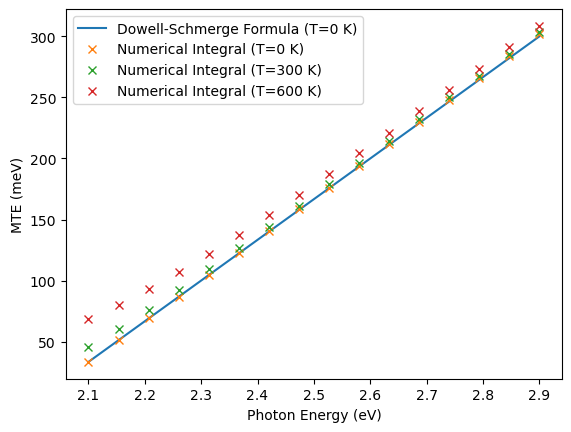

In [3]:
# Plot the MTE vs photon energy and temp
def get_mte(fermi_energy, t, photon_energy, workfun, n_points=128):
    mc2 = 511e3
    (bxm, bxp), (bym, byp), (bzm, bzp) = dowell_schmerge_pdf_bounds(photon_energy, workfun, t, fermi_energy)
    px, py, pz = np.mgrid[bxm:bxp:1j*n_points, bym:byp:1j*n_points, bzm:bzp:1j*n_points]
    rho = dowell_schmerge_pdf(px, py, pz, photon_energy, workfun, t, fermi_energy)
    norm = np.trapz(np.trapz(np.trapz(rho, dx=px[1, 0, 0] - px[0, 0, 0], axis=0), dx=py[0, 1, 0] - py[0, 0, 0], axis=0), dx=pz[0, 0, 1] - pz[0, 0, 0])
    px_sec_moment = np.trapz(np.trapz(np.trapz(px**2*rho, dx=px[1, 0, 0] - px[0, 0, 0], axis=0), dx=py[0, 1, 0] - py[0, 0, 0], axis=0), dx=pz[0, 0, 1] - pz[0, 0, 0])
    return (px_sec_moment/norm)/mc2*1e3

ephoton = np.linspace(2.1, 2.9, 16)
plt.plot(ephoton, (ephoton-2)/3*1e3, label='Dowell-Schmerge Formula (T=0 K)')

for temp in [0, 300, 600]:
    mte = np.array([get_mte(6., temp, ep, 2.) for ep in ephoton])
    plt.plot(ephoton, mte, marker='x', ls='none', label='Numerical Integral (T=%.0f K)' % temp)
plt.legend()
plt.xlabel('Photon Energy (eV)')
plt.ylabel('MTE (meV)')

Text(0.5, 0, 'p$_\\theta$ (radian)')

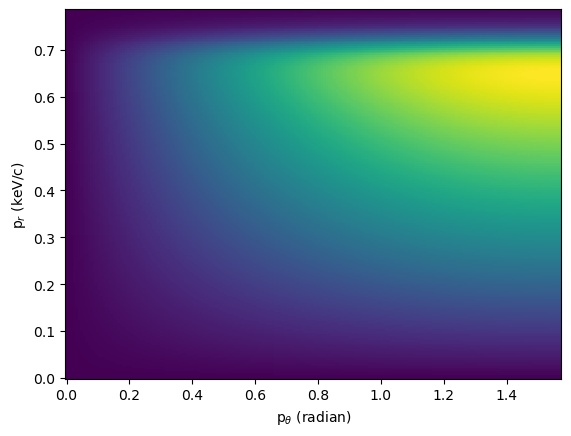

In [4]:
# Demonstrate getting data in spherical coords for integration
(rl, ru), (tl, tu) = dowell_schmerge_pdf_bounds_spherical(photon_energy, workfun, t, fermi_energy)
pt, pr = np.mgrid[tl:tu:1j*n_points, rl:ru:1j*n_points]

rho = dowell_schmerge_pdf_spherical(pr, pt, photon_energy, workfun, t, fermi_energy)
plt.pcolormesh(pt, 1e-3*pr, rho)
plt.ylabel("p$_r$ (keV/c)")
plt.xlabel(r'p$_\theta$ (radian)')